##### Exploratory Data Analysis - Turkey Covid-19 Vaccination Dataset

### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = ("C:\\Users\\Admin\\Desktop\\Courses&Certifications\\Python\\Kaggle\\covid19Vaccination.xlsx")

In [3]:
df = pd.read_excel(file_name)

#### Exploring the Data

In [4]:
df.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
0,438102,2021-06-26 22:41:31,5412,Adana,Adana,784464,355404,1139868,2258718,15,0,15,438021
1,438103,2021-06-26 22:41:31,5412,Adıyaman,Adiyaman,170847,77955,248802,632459,2,0,2,438022
2,438104,2021-06-26 22:41:31,5412,Afyonkarahisar,Afyon,292611,138934,431545,736912,8,0,8,438023
3,438105,2021-06-26 22:41:31,5412,Ağrı,Agri,94807,41146,135953,535435,0,0,0,438024
4,438106,2021-06-26 22:41:31,5412,Aksaray,Aksaray,131889,62603,194492,423011,3,0,3,438025


In [5]:
# Checking the shape—i.e. size—of the data
df.shape

(81, 13)

In [6]:
# Learning the dtypes of columns' and how many non-null values there are in those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
ID            81 non-null int64
DATE_         81 non-null datetime64[ns]
SEQID         81 non-null int64
CITY          81 non-null object
CITY2         81 non-null object
_1DOSE        81 non-null int64
_2DOSE        81 non-null int64
_TOTAL        81 non-null int64
POPULATION    81 non-null int64
DIFF_1DOSE    81 non-null int64
DIFF_2DOSE    81 non-null int64
DIFF_TOTAL    81 non-null int64
PREVID        81 non-null int64
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 8.4+ KB


In [7]:
# Getting the statistical summary of the data 
# (T Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,81.0,4.381420e+05,2.352658e+01,438102.0,438122.0,438142.0,438162.0,438182.0
SEQID,81.0,5.412000e+03,0.000000e+00,5412.0,5412.0,5412.0,5412.0,5412.0
_1DOSE,81.0,3.965429e+05,7.727379e+05,24128.0,106990.0,197631.0,395582.0,6197550.0
_2DOSE,81.0,1.828914e+05,3.171276e+05,13155.0,49145.0,98896.0,187138.0,2419591.0
_TOTAL,81.0,5.794343e+05,1.088717e+06,37283.0,157545.0,294010.0,580524.0,8617141.0
POPULATION,81.0,1.032276e+06,1.872576e+06,81910.0,284923.0,537762.0,1081065.0,15462452.0
DIFF_1DOSE,81.0,8.407407e+00,2.428311e+01,0.0,0.0,1.0,6.0,193.0
DIFF_2DOSE,81.0,4.938272e-01,1.574194e+00,0.0,0.0,0.0,0.0,11.0
DIFF_TOTAL,81.0,8.901235e+00,2.576461e+01,0.0,0.0,1.0,6.0,204.0
PREVID,81.0,4.380610e+05,2.352658e+01,438021.0,438041.0,438061.0,438081.0,438101.0


### Checking the Missing Values and Duplicates

In [8]:
df.isnull().sum()

ID            0
DATE_         0
SEQID         0
CITY          0
CITY2         0
_1DOSE        0
_2DOSE        0
_TOTAL        0
POPULATION    0
DIFF_1DOSE    0
DIFF_2DOSE    0
DIFF_TOTAL    0
PREVID        0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Data Visualization

In [10]:
# Dose 1 , Dose 2 are quantity of vaccine (1 or 2 Doses)
highest_1st_dose = df.sort_values(by="_1DOSE", ascending=False)
highest_1st_dose.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028


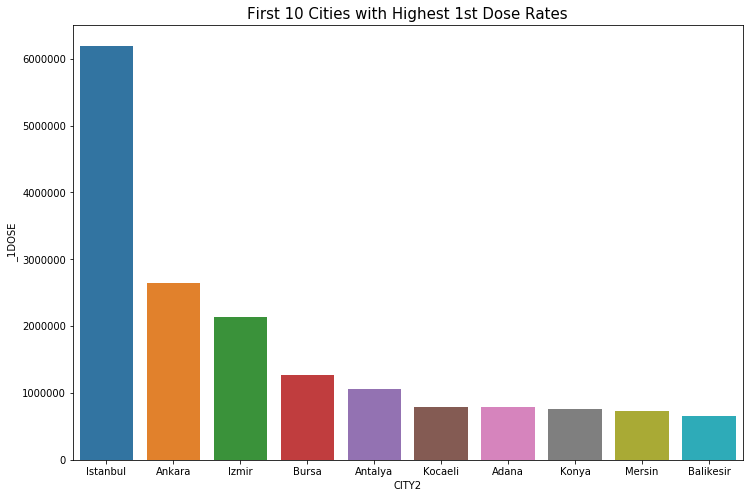

In [11]:
# iloc[:10] first ten rows of your dataframe
plt.figure(figsize=(12,8))
sns.barplot(x=highest_1st_dose.iloc[:10]["CITY2"], y=highest_1st_dose.iloc[:10]["_1DOSE"])
plt.title("First 10 Cities with Highest 1st Dose Rates", size=15)
plt.show()

In [12]:
highest_2nd_dose = df.sort_values(by="_2DOSE", ascending=False)
highest_2nd_dose.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028


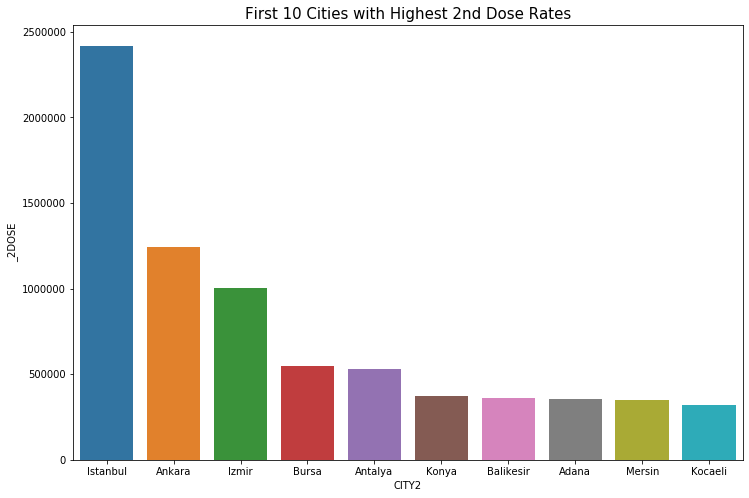

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x=highest_2nd_dose.iloc[:10]["CITY2"], y=highest_2nd_dose.iloc[:10]["_2DOSE"])
plt.title("First 10 Cities with Highest 2nd Dose Rates", size=15)
plt.show()

In [14]:
highest_total_dose = df.sort_values(by="_TOTAL", ascending=False)
highest_total_dose.head()

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID
39,438141,2021-06-26 22:41:31,5412,İstanbul,Istanbul,6197550,2419591,8617141,15462452,193,11,204,438060
6,438108,2021-06-26 22:41:31,5412,Ankara,Ankara,2652085,1241906,3893991,5663322,91,6,97,438027
40,438142,2021-06-26 22:41:31,5412,İzmir,Izmir,2136705,1006223,3142928,4394694,41,4,45,438061
20,438122,2021-06-26 22:41:31,5412,Bursa,Bursa,1272038,550539,1822577,3101833,41,4,45,438041
7,438109,2021-06-26 22:41:31,5412,Antalya,Antalya,1055350,530415,1585765,2548308,29,4,33,438028


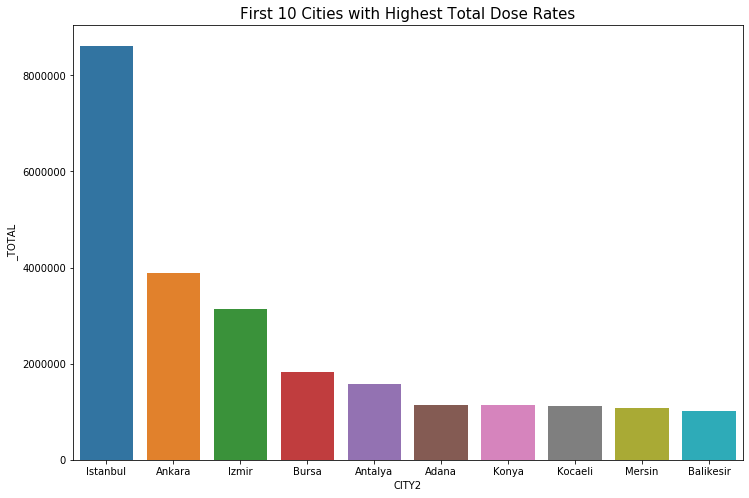

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x=highest_total_dose.iloc[:10]["CITY2"], y=highest_total_dose.iloc[:10]["_TOTAL"])
plt.title("First 10 Cities with Highest Total Dose Rates", size=15)
plt.show()

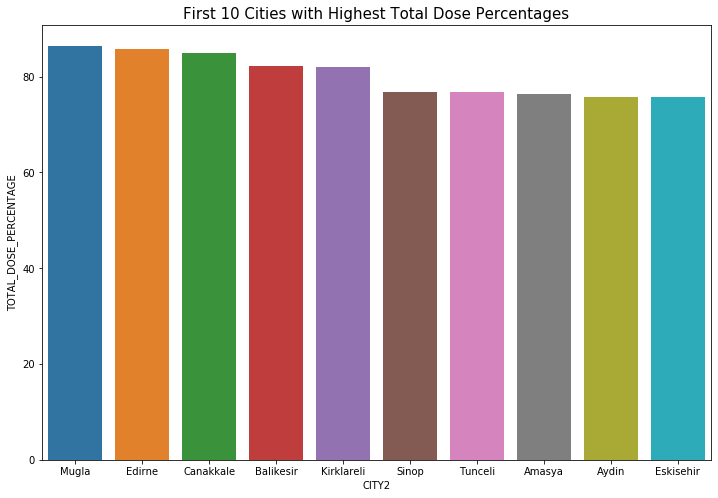

In [16]:
df["TOTAL_DOSE_PERCENTAGE"] = (df["_TOTAL"]/df["POPULATION"])*100
total_dose_percentage = df.sort_values(by="TOTAL_DOSE_PERCENTAGE", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=total_dose_percentage.iloc[:10]["CITY2"], y=total_dose_percentage.iloc[:10]["TOTAL_DOSE_PERCENTAGE"])
plt.title("First 10 Cities with Highest Total Dose Percentages", size=15)
plt.show()

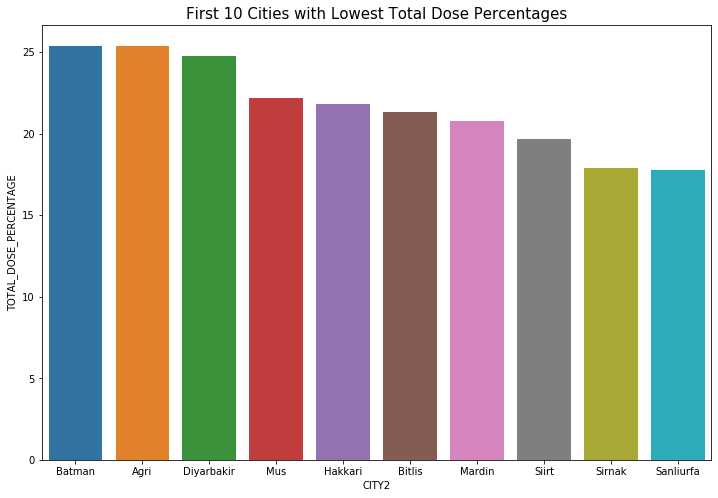

In [17]:
# iloc[-10:] last ten rows of your dataframe
lowest_dose_percentage = df.sort_values(by="TOTAL_DOSE_PERCENTAGE")

plt.figure(figsize=(12,8))
sns.barplot(x=total_dose_percentage.iloc[-10:]["CITY2"], y=total_dose_percentage.iloc[-10:]["TOTAL_DOSE_PERCENTAGE"])
plt.title("First 10 Cities with Lowest Total Dose Percentages", size=15)
plt.show()

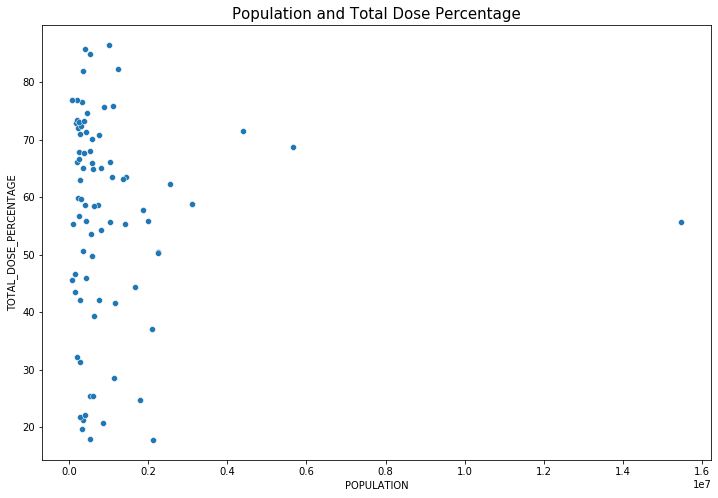

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["POPULATION"], y=df["TOTAL_DOSE_PERCENTAGE"])
plt.title("Population and Total Dose Percentage", size=15)
plt.show()

In [36]:
df[["CITY2","POPULATION", "TOTAL_DOSE_PERCENTAGE"]].sort_values(by="TOTAL_DOSE_PERCENTAGE").iloc[-10:]

,CITY2,POPULATION,TOTAL_DOSE_PERCENTAGE
31,Eskisehir,888828,75.679997
10,Aydin,1119084,75.866959
5,Amasya,335494,76.486316
75,Tunceli,83443,76.829692
68,Sinop,216460,76.870553
48,Kirklareli,361737,81.973091
11,Balikesir,1240285,82.279234
21,Canakkale,541548,84.959228
27,Edirne,407763,85.799104
58,Mugla,1000773,86.495139


In [37]:
lowest_dose_percentage.iloc[-10:]

,ID,DATE_,SEQID,CITY,CITY2,_1DOSE,_2DOSE,_TOTAL,POPULATION,DIFF_1DOSE,DIFF_2DOSE,DIFF_TOTAL,PREVID,TOTAL_DOSE_PERCENTAGE
31,438133,2021-06-26 22:41:31,5412,Eskişehir,Eskisehir,457620,215045,672665,888828,13,0,13,438052,75.679997
10,438112,2021-06-26 22:41:31,5412,Aydın,Aydin,555807,293208,849015,1119084,10,0,10,438031,75.866959
5,438107,2021-06-26 22:41:31,5412,Amasya,Amasya,169285,87322,256607,335494,1,0,1,438026,76.486316
75,438177,2021-06-26 22:41:31,5412,Tunceli,Tunceli,40463,23646,64109,83443,0,0,0,438096,76.829692
68,438170,2021-06-26 22:41:31,5412,Sinop,Sinop,104450,61944,166394,216460,0,0,0,438089,76.870553
48,438150,2021-06-26 22:41:31,5412,Kırklareli,Kirklareli,197631,98896,296527,361737,0,0,0,438069,81.973091
11,438113,2021-06-26 22:41:31,5412,Balıkesir,Balikesir,661424,359073,1020497,1240285,18,1,19,438032,82.279234
21,438123,2021-06-26 22:41:31,5412,Çanakkale,Canakkale,298662,161433,460095,541548,0,0,0,438042,84.959228
27,438129,2021-06-26 22:41:31,5412,Edirne,Edirne,226150,123707,349857,407763,2,1,3,438048,85.799104
58,438160,2021-06-26 22:41:31,5412,Muğla,Mugla,578641,286979,865620,1000773,6,0,6,438079,86.495139
